In [1]:
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the MNIST Dataset

In [2]:
from keras.datasets.mnist import load_data
(x_train,y_train),(x_test,y_test) = load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
len(y_train)

60000

In [7]:
import pandas as pd
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

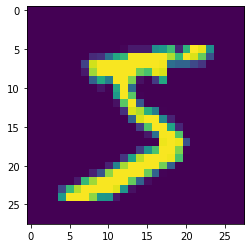

In [9]:
plt.imshow(x_train[0])

Text(0.5, 1.0, 'Digit  5')

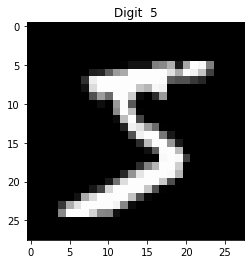

In [13]:
plt.imshow(x_train[0],cmap="gray")
plt.title("Digit  "+str(y_train[0]))

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

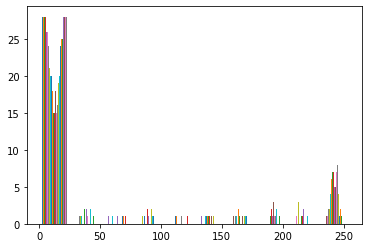

In [14]:
plt.hist(x_train[0])

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

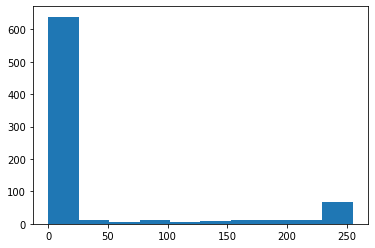

In [15]:
plt.hist(x_train[0].flat)

(array([620.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,
          0.,   0.,   1.,   0.,   2.,   0.,   5.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
          1.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1., 

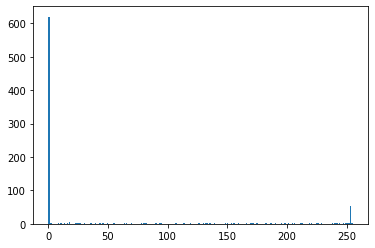

In [16]:
plt.hist(x_train[0].flat,bins=250)

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

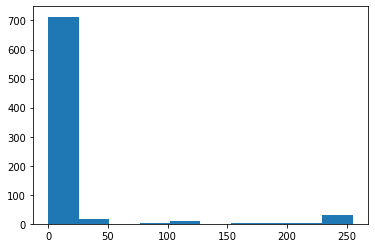

In [18]:
plt.hist(x_train[14].flat)

In [19]:
x_train[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [21]:
y_train[10:16]

array([3, 5, 3, 6, 1, 7], dtype=uint8)

In [22]:
samples = np.random.randint(x_train.shape[0],size=16)
samples

array([35565, 29200, 53905, 31254, 44564, 17562, 36994,  1529, 26795,
        1631, 37743, 43530, 56156, 51289, 54406, 24956])

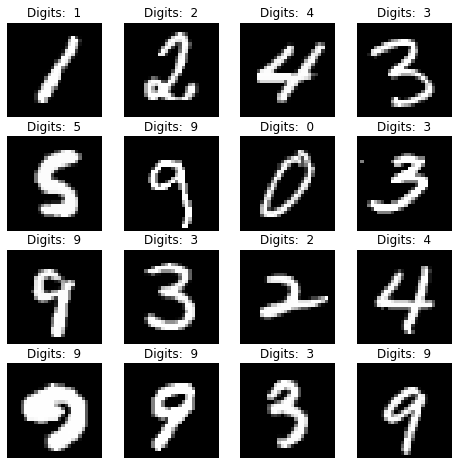

In [28]:
plt.figure(figsize=(8,8))
for i in range(len(samples)):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[samples[i]],cmap="gray")
  plt.title("Digits:  "+str(y_train[samples[i]]))
  plt.axis('off')


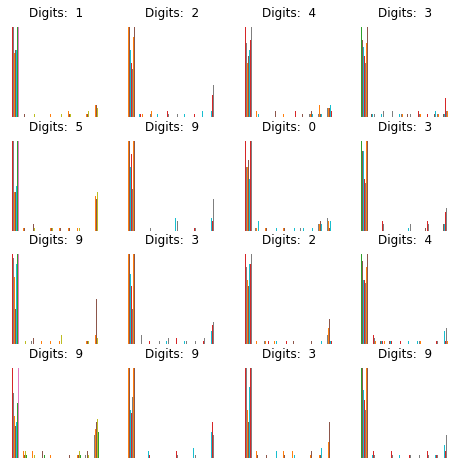

In [30]:
plt.figure(figsize=(8,8))
for i in range(len(samples)):
  plt.subplot(4,4,i+1)
  plt.hist(x_train[samples[i]])
  plt.title("Digits:  "+str(y_train[samples[i]]))
  plt.axis('off')

In [34]:
#Scaling data
x_train_sc = x_train/255.0
x_test_sc = x_test/255.0

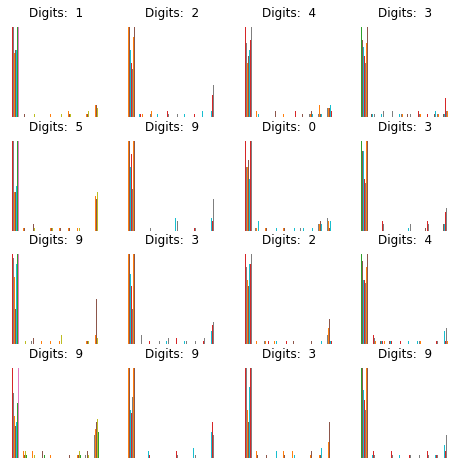

In [35]:
plt.figure(figsize=(8,8))
for i in range(len(samples)):
  plt.subplot(4,4,i+1)
  plt.hist(x_train_sc[samples[i]])
  plt.title("Digits:  "+str(y_train[samples[i]]))
  plt.axis('off')

In [36]:
#Converting labels into categorical
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_train_cat[1:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
y_test_cat = to_categorical(y_test)
y_test_cat[1:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x_train_sc,y_train_cat,test_size=0.2,random_state=32)
print(x_tr.shape,y_tr.shape,x_val.shape,y_val.shape)

(48000, 28, 28) (48000, 10) (12000, 28, 28) (12000, 10)


Build and Train the Model

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [43]:
#creating a base model
model = Sequential()
#first layer-Input 
model.add(Flatten(input_shape=(28,28)))
#Dense - Fully Connected Hidden layers
model.add(Dense(128,activation="relu")) #784*128+128=100480
model.add(Dense(128,activation="relu")) #128*128+128=16512
model.add(Dense(64,activation="relu"))  #128*64+64=8256
model.add(Dense(256,activation="relu")) #64*256+256=16640
#Final Layer-Output
model.add(Dense(10,activation="softmax")) #256*10+10=2570
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [50]:
model.compile(optimizer="adam",loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [54]:
history = model.fit(x_tr,y_tr,epochs=10,validation_data=(x_val,y_val),batch_size=32)
history

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0819 - accuracy: 0.9743 - val_loss: 0.1250 - val_accuracy: 0.9643
Epoch 2/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.0753 - accuracy: 0.9766 - val_loss: 0.1345 - val_accuracy: 0.9628
Epoch 3/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.0704 - accuracy: 0.9772 - val_loss: 0.1168 - val_accuracy: 0.9681
Epoch 4/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.0646 - accuracy: 0.9799 - val_loss: 0.1228 - val_accuracy: 0.9647
Epoch 5/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0603 - accuracy: 0.9803 - val_loss: 0.1224 - val_accuracy: 0.9657
Epoch 6/10
48000/48000 [==============================] - 6s 131us/step - loss: 0.0557 - accuracy: 0.9814 - val_loss: 0.1245 - val_accuracy: 0.9652
Epoch 7/10
48000/48000 [==============================] - 6s 1

Evaluate the model

In [60]:
model.evaluate(x_test_sc,y_test_cat)

10000/10000 [==============================] - 0s 31us/step


[0.12145042869814206, 0.9674000144004822]

In [61]:
print(x_test.shape)

(10000, 28, 28)


In [62]:
print(x_test[0].shape)

(28, 28)


In [66]:
print(np.expand_dims(x_test_sc[0],axis=0).shape)

(1, 28, 28)


In [69]:
model.predict(np.expand_dims(x_test_sc[0],axis=0))

array([[8.4477323e-09, 4.1648843e-07, 6.1279003e-05, 1.5871057e-06,
        2.1937268e-11, 7.2518920e-09, 2.3432441e-16, 9.9992085e-01,
        7.1498460e-09, 1.5901684e-05]], dtype=float32)

In [70]:
y_test[0]

7

In [83]:
model.predict_classes(np.expand_dims(x_test_sc[0],axis=0))

array([7])

In [82]:
model.predict(x_test_sc[:5])

array([[8.4477323e-09, 4.1648843e-07, 6.1279003e-05, 1.5871071e-06,
        2.1937268e-11, 7.2518920e-09, 2.3432351e-16, 9.9992085e-01,
        7.1498731e-09, 1.5901684e-05],
       [6.2866695e-10, 2.5841531e-05, 9.9016142e-01, 9.7334534e-03,
        3.5616817e-13, 2.9515530e-05, 1.2076686e-09, 1.2582331e-07,
        4.9649323e-05, 1.3030387e-14],
       [9.7452528e-08, 9.9906713e-01, 1.2581317e-04, 5.4978483e-07,
        3.9976992e-05, 6.6640940e-05, 1.7377126e-04, 6.2235990e-06,
        5.1968935e-04, 8.6678384e-08],
       [9.9978632e-01, 1.8705985e-12, 8.2365714e-06, 1.8143247e-06,
        7.4302513e-08, 1.5927240e-05, 3.3301156e-05, 1.2067143e-06,
        8.4385687e-07, 1.5220398e-04],
       [1.4141389e-08, 3.4941462e-07, 7.9606834e-06, 3.6631570e-13,
        9.9989092e-01, 2.6960373e-07, 1.7052631e-08, 1.8305389e-05,
        6.9738043e-08, 8.2002145e-05]], dtype=float32)

In [74]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [75]:
history.history

{'accuracy': [0.9742708,
  0.97658336,
  0.9772083,
  0.9799375,
  0.98025,
  0.98139584,
  0.98247916,
  0.9831667,
  0.98552084,
  0.9853333],
 'loss': [0.08185264852123024,
  0.07525204087072052,
  0.0703608764463958,
  0.06462094053269053,
  0.06027184545795899,
  0.055748173068646184,
  0.05258030351922692,
  0.05145937546203883,
  0.04415993400507917,
  0.04304608872173897],
 'val_accuracy': [0.9642500281333923,
  0.9628333449363708,
  0.9680833220481873,
  0.9647499918937683,
  0.965666651725769,
  0.9651666879653931,
  0.9649999737739563,
  0.9625833630561829,
  0.9670833349227905,
  0.9674166440963745],
 'val_loss': [0.1250082875220105,
  0.13450222031461695,
  0.11683280411347126,
  0.12277734842834373,
  0.1224108665632084,
  0.12453030208963901,
  0.12853967935033142,
  0.1409318404911707,
  0.13746287639827157,
  0.12673408210921722]}

In [77]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [79]:
history.history['accuracy']

[0.9742708,
 0.97658336,
 0.9772083,
 0.9799375,
 0.98025,
 0.98139584,
 0.98247916,
 0.9831667,
 0.98552084,
 0.9853333]

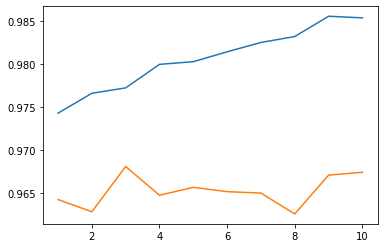

In [81]:
plt.plot(range(1,11), history.history['accuracy'])
plt.plot(range(1,11), history.history['val_accuracy'])